# CS3802--Machine Learning Algorithms Lab

Adithya V |
BTech CSE (IoT) - A | 21011102009

## Exercise 1
---
### a) Create a random 2-D numpy array with 1500 values. Simulate different lines of fit using 1000 values from the array and find the errors for each of these lines. Find the line with the least error among these lines and store it as the line of best fit. Using this line of best fit, predict the target variable for the other 500 values. 

### Importing the libraries

In [124]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Creating a random 2-D numpy array with 1500 values

In [125]:
np.random.seed(42)
random_array = np.random.rand(1500, 2)

 * Separating the array into features (X) and target variable (y)
 * Simulate different lines of fit using 1000 values from the array

In [126]:
X = random_array[:, 0]
y = random_array[:, 1]


In [127]:
num_points = 1000
X_train = X[:num_points].reshape(-1, 1)
y_train = y[:num_points]
errors = []

### Fit linear regression models and calculate errors

In [128]:
for i in range(1000):
    slope = np.random.rand() * 2 - 1 
    intercept = np.random.rand() * 2 - 1      
    model = LinearRegression()    
   
    model.fit(X_train, slope * X_train + intercept)
    
    y_pred = model.predict(X_train)
    
    # Calculate mean squared error
    error = mean_squared_error(y_train, y_pred)
    
    # Append the error to the list
    errors.append((slope, intercept, error))
    
best_fit_line = min(errors, key=lambda x: x[2])


### Plotting the data points and the line of best fit

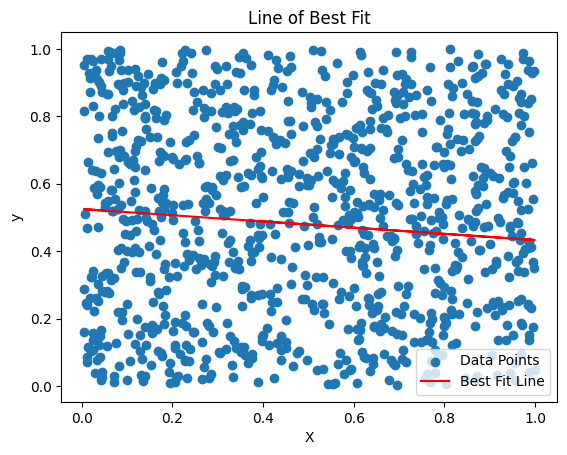

In [129]:
plt.scatter(X_train, y_train, label='Data Points')
plt.plot(X_train, best_fit_line[0] * X_train + best_fit_line[1], color='red', label='Best Fit Line')
plt.title('Line of Best Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

* Using the line of best fit, predict the target variable for the other 500 values 
* Print the predicted values for the remaining 500 data points

In [130]:

X_test = X[num_points:].reshape(-1, 1)
y_test_pred = best_fit_line[0] * X_test + best_fit_line[1]

print("Predicted Values for the remaining 500 data points:")
# print(y_test_pred) for printing 500 values
# I am printinngh the first 5 values
print(y_test_pred[:5])

Predicted Values for the remaining 500 data points:
[[0.50081171]
 [0.44150021]
 [0.49986906]
 [0.48350878]
 [0.51887891]]


---
### b) Use the data1.csv to build a simple linear regression from scratch without using sklearn libraries and print the RMSE and mean absolute error values. Use both the equations available in the slides (in theory page) to build the model and compare the intercept and coefficient values.

### Importing necessary libraries and reading the dataset

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data = pd.read_csv(r'data1.csv')
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


In [133]:
data.shape
data.isna().sum()

x    0
y    0
dtype: int64

### Building Simple Linear Regression from Scratch

* Calculate the mean of X and y
* Calculate the total number of data points
* Using the formulas for slope (beta_1) and intercept (beta_0)

In [134]:
def simple_linear_regression(X, y):
 
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    n = len(X)
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - mean_X) * (y[i] - mean_y)
        denominator += (X[i] - mean_X) ** 2

    b1 = numerator / denominator
    b0 = mean_y - (b1 * mean_X)

    return b0, b1

###  Defining Functions to 
* Predict
* Calculate Root Mean Squared Error (RMSE)
* Calculate Mean Absolute Error (MAE)
* Calculate Mean Squared Error (MSE)

In [135]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

# Root Mean Squared Error (RMSE)
def calculate_rmse(y_true, y_pred):
     return np.sqrt(np.mean((y_true - y_pred)**2))

# Mean Absolute Error (MAE)
def calculate_mae(y_true, y_pred):
      return np.mean(np.abs(y_true - y_pred))

# Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):   
    return np.mean((y_true - y_pred)**2)

Define the features (X) and target variable (y)

In [136]:

X = data['x'].values
y = data['y'].values

In [137]:
#Simple Linear Regression
b0, b1 = simple_linear_regression(X, y)

# Print the calculated slope and intercept
print(f'Slope (b1): {b1}')
print(f'Intercept (b0): {b0}')

# Make predictions
y_pred = predict(X, b0, b1)

# Calculate and print RMSE, MAE, and MSE
rmse = calculate_rmse(y, y_pred)
mae = calculate_mae(y, y_pred)
mse = calculate_mse(y, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Slope (b1): 3.1792452830188656
Intercept (b0): 30.103773584905703
Root Mean Squared Error (RMSE): 8.817810022046613
Mean Absolute Error (MAE): 7.305660377358489
Mean Squared Error (MSE): 77.75377358490569


### Verifying the manually calculated errors with errors calculated using sklearn library

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [139]:

rmse_sklearn = np.sqrt(mean_squared_error(y, y_pred))
mae_sklearn = mean_absolute_error(y, y_pred)
mse_sklearn = mean_squared_error(y, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse_sklearn}')
print(f'Mean Absolute Error (MAE): {mae_sklearn}')
print(f'Mean Squared Error (MSE): {mse_sklearn}')


Root Mean Squared Error (RMSE): 8.817810022046613
Mean Absolute Error (MAE): 7.305660377358489
Mean Squared Error (MSE): 77.75377358490569


---